## Table of Contents
1. Import Libraries
2. Correlation Heatmap
3. Scatterplot
4. Pairplot
5. Categorical Plots
6. Hypotheses 

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick  
import os

In [3]:
path = r'C:\Users\olivi\OneDrive\Documents\Data Analytics\Data Analytics Immersion\Boat Sales Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data.csv'))

In [5]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
1,2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,2005,3.69,1.42,Aluminium,Switzerland,124
2,4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
3,5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,2005,4.03,1.56,Aluminium,Switzerland,132
4,10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239


## Correlation Heatmap

In [22]:
# Split 'Price' into 'Currency' and 'Amount'
df[['Currency', 'Amount']] = df['Price'].str.extract(r'([A-Z]+)\s*([\d\.]+)')
df['Amount'] = df['Amount'].astype(float)  # Convert 'Amount' to float

print(df)

      Unnamed: 0     Price            Boat Type           Manufacturer  \
0              1  EUR 3490  Center console boat      Terhi power boats   
1              2  CHF 3770           Sport Boat     Marine power boats   
2              4  EUR 3399         Fishing Boat     Linder power boats   
3              5  CHF 3650           Sport Boat     Linder power boats   
4             10  CHF 3500         Fishing Boat      Terhi power boats   
...          ...       ...                  ...                    ...   
7029        9880  CHF 4980           Sport Boat     Linder power boats   
7030        9881  CHF 4950           Sport Boat     Marine power boats   
7031        9882  CHF 4950         Fishing Boat  Staempfli power boats   
7032        9885  EUR 4499           Sport Boat  BlueCraft power boats   
7033        9887  CHF 3780         Fishing Boat    DarekCo power boats   

                              Type  Year Built  Length  Width       Material  \
0              new boat from st

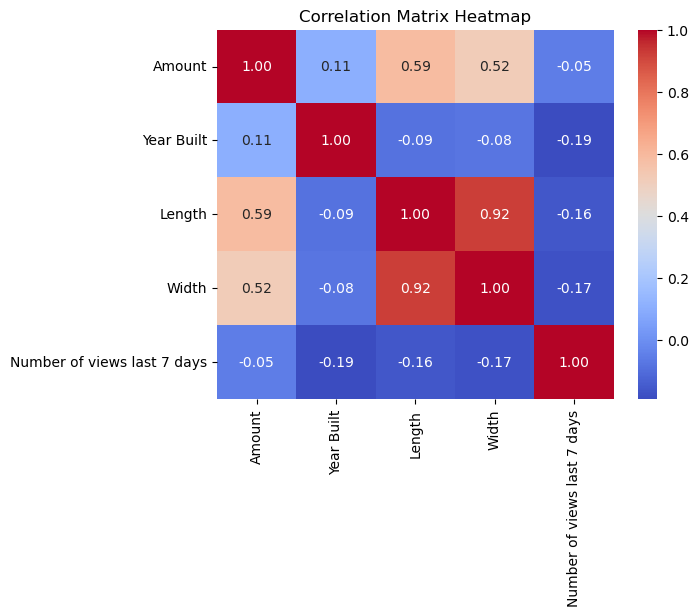

In [177]:
 # Select Numerical Columns for Correlation
numerical_columns = ['Amount', 'Year Built', 'Length', 'Width', 'Number of views last 7 days']
correlation_matrix = df[numerical_columns].corr()

# Create the Heatmap
correlation_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [179]:
correlation_heatmap.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'Correlation_heatmap.png'))

# Interpretations
There is a strong correlation between the Length and Width of the boats. There is a moderate relationship with the length, width and, amount/price columns. There doesn't seem to be a correlation with the number of views and the amount, year built, length, and width. This shows that people are likely looking at all types of boats and aren't selecting them based on these additional factors.

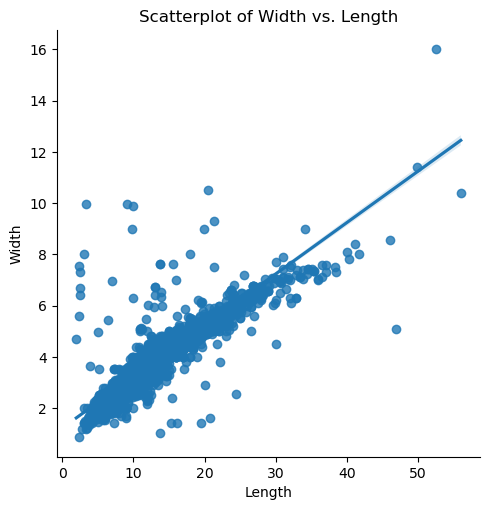

In [181]:
Width_Length_Scatter = sns.lmplot(x='Length', y='Width', data=df)
plt.title('Scatterplot of Width vs. Length')
plt.show()


In [183]:
Width_Length_Scatter.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'Width_Length_Scatter.png'))

## Scatterplot 
Very Strong Relationship:

The value is close to 1, meaning Width and Length are highly linearly related.
As the length of a boat increases, its width also increases in almost perfect proportion.
Practical Interpretation:

This is expected in boats, as larger boats (in length) often require greater width for stability, capacity, and structural integrity.
This could also suggest a standard design principle where length and width are scaled together.

## Pair Plots

In [46]:
df_2 = df[['Amount', 'Year Built', 'Length', 'Width', 'Number of views last 7 days']]

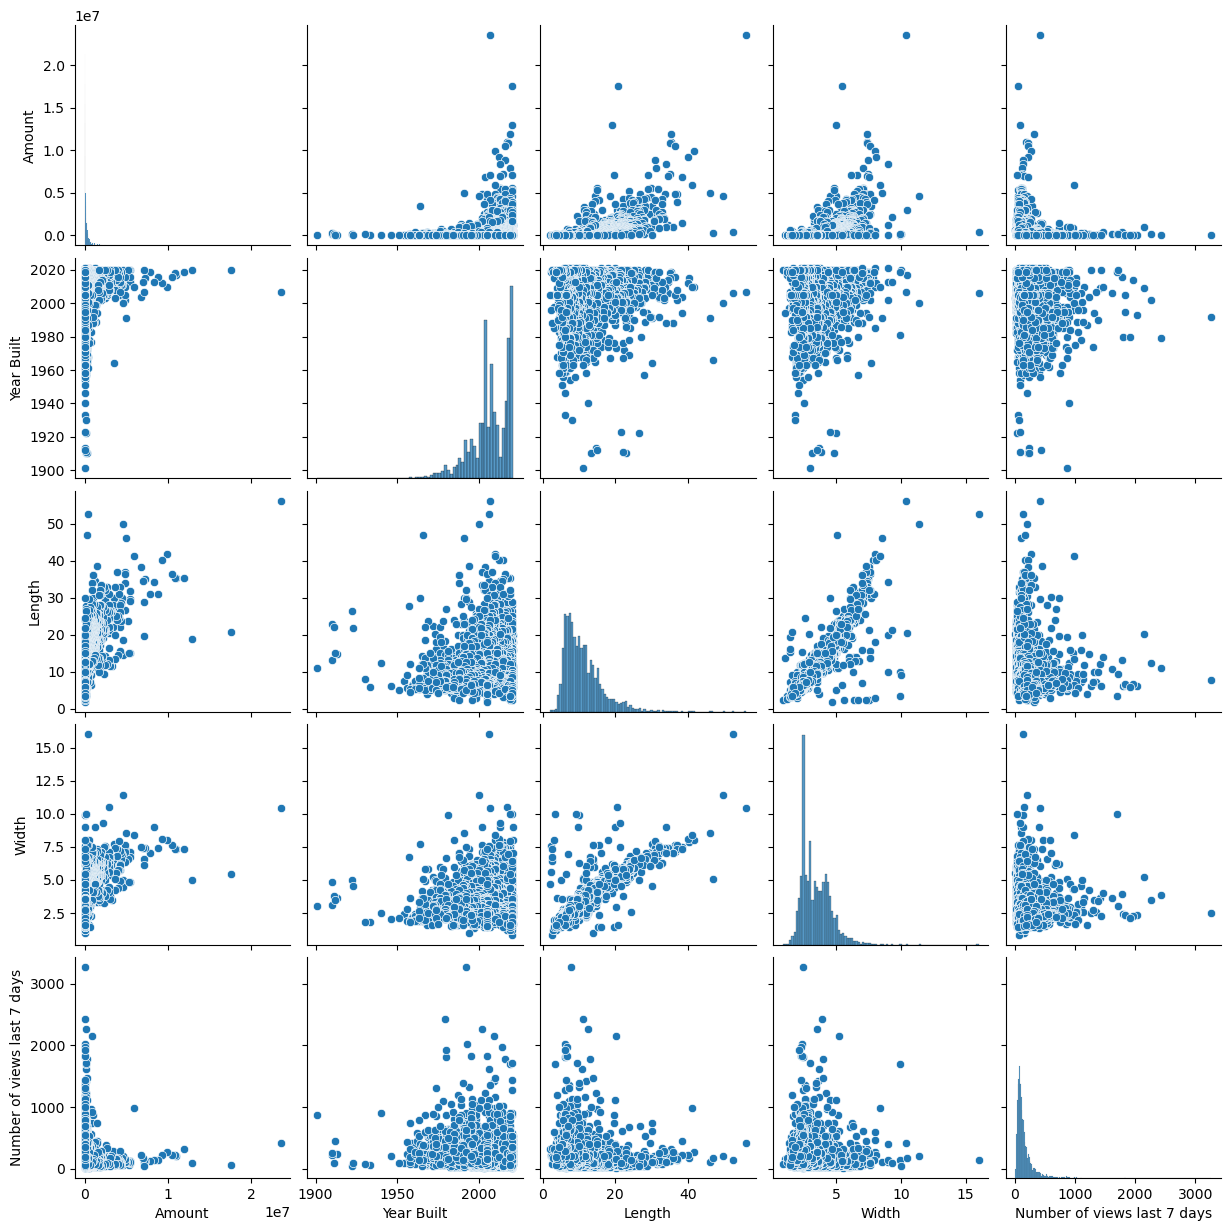

In [48]:
# Create a pair plot
g = sns.pairplot(df_2)

In [185]:
g.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'pair_plots.png'))

## Categorical Plots

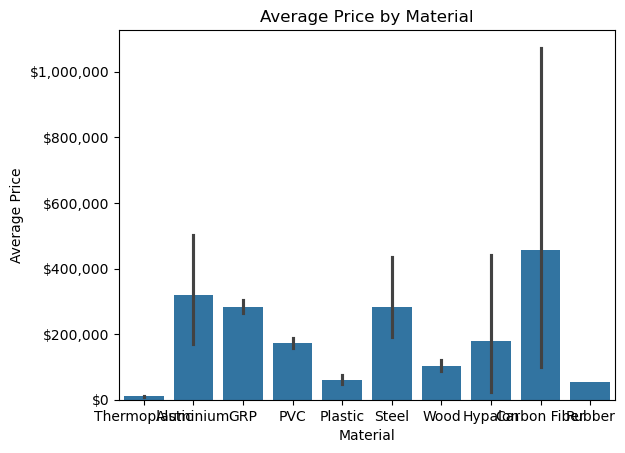

In [187]:
# Create a bar plot showing the average 'Amount' for each 'Material'
bar_material_price = sns.barplot(x='Material', y='Amount', data=df, estimator='mean')

# Title and labels
plt.title('Average Price by Material')
plt.xlabel('Material')
plt.ylabel('Average Price')

# Format the y-axis to show currency (with $ and commas)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.show()


In [191]:
bar_material_price.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_material_price.png'))

## Conclusion
The bar plot suggests that carbon fiber, aluminum, and steel are associated with higher-priced boats, likely due to their superior strength, durability, and performance characteristics. Carbon fiber boats are positioned at the top end of the price range due to their lightweight and high-performance qualities, while aluminum and steel offer cost-effective yet durable alternatives. On the other hand, materials like fiberglass, wood, and plastic are generally more affordable, which may indicate that these materials are used in more standard or entry-level boats.

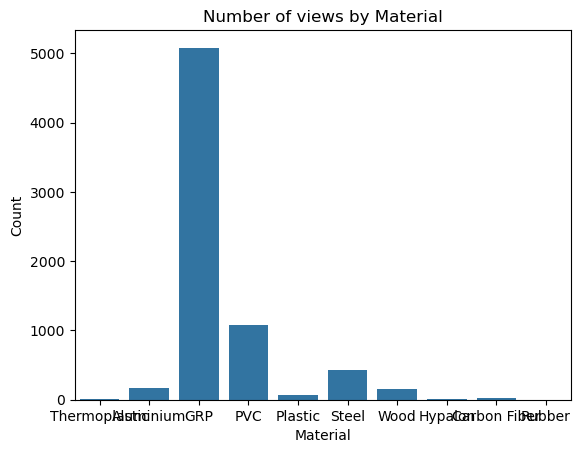

In [193]:
# Create a count plot to see the distribution of boat prices by material
scat_material_view = sns.countplot(x='Material', data=df)
plt.title('Number of views by Material')
plt.xlabel('Material')
plt.ylabel('Count')
plt.show()


In [195]:
scat_material_view.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'scat_material_view.png'))

## Conclusion
The bar chart suggests that GRP, PVC, and steel boats are among the most viewed, likely due to their widespread use, affordability, and appeal to different buyer segments. GRP boats are popular for their lightweight and durable nature, while PVC boats are known for their low-cost and inflatable options. Steel boats attract views due to their strength and use in large or commercial vessels.

On the other hand, boats made from wood or carbon fiber may receive fewer views due to their niche appeal and higher price points, suggesting that they are targeted toward more specific buyers or enthusiasts.

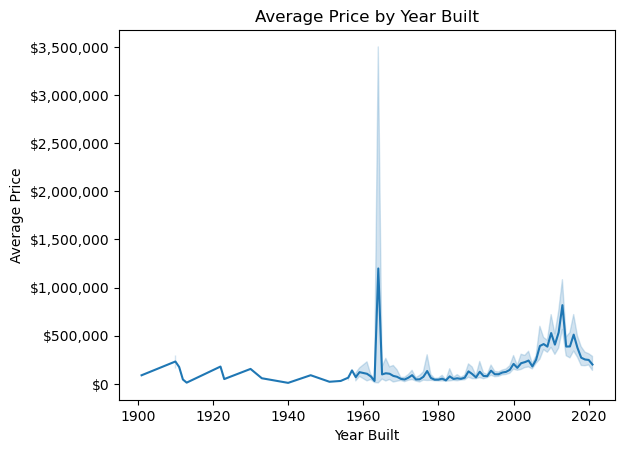

In [197]:
# Create a line plot showing the average 'Amount' for each 'Year Built'
line_year_price = sns.lineplot(x='Year Built', y='Amount', data=df, estimator='mean')
plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')

# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [199]:
line_year_price.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'line_year_price.png'))

## Conclusion:
The scatter plot suggests that boats from the 1960s and 2000s are priced the most expensively, which could be due to a combination of vintage appeal (for the 1960s) and modern performance features (for the 2000s). The 1960s boats are likely valued for their collectible and historical significance, while the 2000s boats could be priced higher because of technological advancements and superior materials used in their production.

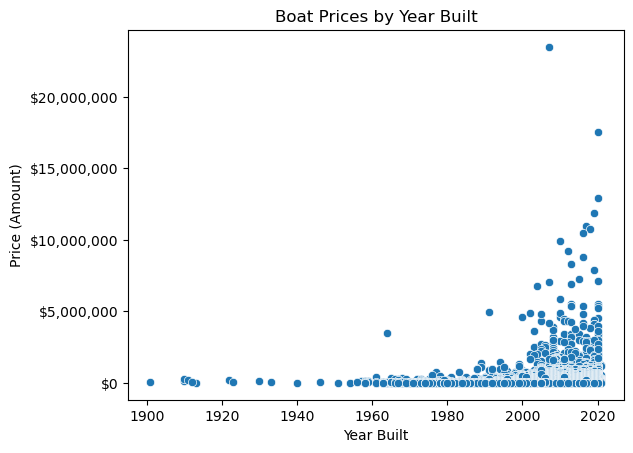

In [201]:
# Create a scatter plot of boat prices by year built
scat_price_year_built = sns.scatterplot(x='Year Built', y='Amount', data=df)

# Set titles and labels
plt.title('Boat Prices by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price (Amount)')

# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.show()

In [203]:
scat_price_year_built.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'scat_price_year_built.png'))

## Conclusion
The scatter plot indicates a positive correlation between the year built and price of the boat. Newer boats are priced higher, possibly due to their advanced features, newer technology, and better condition. However, there is still considerable variation in the prices of older boats, indicating that factors such as brand, condition, and type may also influence the price. While age is an important factor, it is not the sole determinant of price.

## Hypotheses
1. Hypothesis: Boat prices increase as the year of manufacture increases.
Null Hypothesis (H₀): There is no relationship between the year a boat was built and its price.
Alternative Hypothesis (H₁): There is a positive relationship between the year a boat was built and its price, i.e., newer boats tend to have higher prices.
2. Hypothesis: Boats made from certain materials have higher average prices.
Null Hypothesis (H₀): The material of a boat does not affect its price.
Alternative Hypothesis (H₁): Boats made from certain materials (e.g., fiberglass, wood, aluminum) have significantly different average prices.
3. Hypothesis: Boats that have been viewed more frequently in the last 7 days are priced higher.
Null Hypothesis (H₀): There is no relationship between the number of views in the last 7 days and the price of a boat.
Alternative Hypothesis (H₁): There is a positive relationship between the number of views in the last 7 days and the price of a boat, i.e., boats with more views tend to be priced higher.
4. Hypothesis: The width and length of a boat are positively correlated with its price.
Null Hypothesis (H₀): There is no correlation between boat dimensions (width and length) and its price.
Alternative Hypothesis (H₁): Boat dimensions (width and length) are positively correlated with price, meaning larger boats tend to be more expensive.
5. Hypothesis: The average price of boats has increased over time.
Null Hypothesis (H₀): There has been no significant change in boat prices over the years.
Alternative Hypothesis (H₁): The average price of boats has increased over time.

## Export Data

In [205]:
df.to_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'boat_data_assignment_2.csv'))